In [1]:
import math

import matplotlib.image as mpltimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

path=r'D:/Study/Python/openCV/College/res/'

In [2]:
def zero_padding(arr,size):
    new_zpad_img=np.zeros((arr.shape[0]+2*size,arr.shape[1]+2*size))
    for i in range (arr.shape[0]):
        for j in range (arr.shape[1]):
            new_zpad_img[i+size][j+size]=arr[i][j]
    return new_zpad_img

In [3]:
def duplicate_padding(arr, size):

    upper_b = []  # Initialise a list to take the upper border pixels of real image
    left_b = []  # Initialise a list to take the left border pixels of real image
    lower_b = []  # Initialise a list to take the lower border pixels of real image
    right_b = []  # Initialise a list to take the right border pixels of real image

    # Fill upper_b by upper border pixels of real image
    for i in range(size, arr.shape[1]-size):
        upper_b.append(arr[size][i])

    # Copy upper_b in upper padded zero pixels
    for i in range(size-1, -1, -1):
        upper_b.insert(0, upper_b[0])  # Copying 1st pixel of upper boundary
        # Copying last pixel of upper boundary
        upper_b.append(upper_b[len(upper_b)-1])
        arr[i][i:i+len(upper_b)] = upper_b

    # Fill left_b by left border pixels of real image
    for i in range(size, arr.shape[0]-size):
        left_b.append(arr[i][size])

    # Copy left_b in left padded zero pixels
    for i in range(size-1, -1, -1):
        left_b.insert(0, left_b[0])
        left_b.append(left_b[len(left_b)-1])
        index = 0
        for j in range(i, i+len(left_b)):
            arr[j][i] = left_b[index]
            index += 1

    # Fill lower_b by lower border pixels of real image
    for i in range(size, arr.shape[1]-size):
        lower_b.append(arr[arr.shape[0]-size-1][i])

    # Copy lower_b in lower padded zero pixels
    t = size-1
    for i in range(arr.shape[0]-size, arr.shape[0]):
        lower_b.insert(0, lower_b[0])
        lower_b.append(lower_b[len(lower_b)-1])
        arr[i][t:t+len(lower_b)] = lower_b
        t -= 1

    # Fill right_b by right border pixels of real image
    for i in range(size, arr.shape[0]-size):
        right_b.append(arr[i][arr.shape[1]-size-1])

    # Copy right_b in right padded zero pixels
    t = size-1
    for i in range(arr.shape[1]-size, arr.shape[1]):
        right_b.insert(0, right_b[0])
        right_b.append(right_b[len(right_b)-1])
        index = 0
        for j in range(t, t+len(right_b)):
            arr[j][i] = right_b[index]
            index += 1
        t -= 1

    return arr  # Return the padded array of duplicate boundary pixel


In [4]:
def mirror_padding(arr, img, size):
    row=1 # Upper boundary
    for i in range(size-1,-1,-1):
        arr[i][size:size+img.shape[1]]=img[row][0:img.shape[1]]
        row+=1
    
    row=img.shape[0]-2 # Lower boundary
    for i in range(size+img.shape[0],size*2+img.shape[0]):
        arr[i][size:size+img.shape[1]]=img[row][0:img.shape[1]]
        row-=1

    col=1 #Left
    for i in range(size-1,-1,-1):
        row=0
        for j in range(size,size+img.shape[0]):
            arr[j][i]=img[row][col]
            row+=1
        col+=1
    
    col=img.shape[1]-2 # Right
    for i in range(size+img.shape[1],size+img.shape[1]+size):
        row=0
        for j in range(size,size+img.shape[0]):
            arr[j][i]=img[row][col]
    
    for i in range(size):
        for j in range(size):
            arr[i][j]=arr[i][size*2-j]

    for i in range(size):
        for j in range(size):
            arr[i+size+img.shape[0]][j]=arr[i+size+img.shape[0]][size*2-j]
    
    for i in range(size):
        for j in range(size):
            arr[i][j+size+img.shape[1]]=arr[i][j+img.shape[1]]

    for i in range(size):
        for j in range(size):
            arr[i+size+img.shape[0]][j+size+img.shape[1]]=arr[i+size+img.shape[0]][j+img.shape[1]]

    return arr

In [5]:
def padding(img, size, type):

    # Initialise the Padded Matrix
    padded_arr = np.zeros((img.shape[0]+(size*2), img.shape[1]+(size*2)))

    # Fill the padded matrix by original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+size][j+size] = img[i][j]

    if type == 0:
        padded_arr= zero_padding(padded_arr, size)
    if(type == 1):
        padded_arr = duplicate_padding(padded_arr, size)
    else:
        padded_arr = mirror_padding(padded_arr,size)

    return padded_arr

In [6]:
def padding(img, size, type):

    # Initialise the Padded Matrix
    padded_arr = np.zeros((img.shape[0]+(size*2), img.shape[1]+(size*2)))

    # Fill the padded matrix by original image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+size][j+size] = img[i][j]

    if type == 0:
        padded_arr= zero_padding(padded_arr, size)
    if(type == 1):
        padded_arr = duplicate_padding(padded_arr, size)
    else:
        padded_arr = mirror_padding(padded_arr,img,size)

    return padded_arr

In [7]:
def convolution2D(img, kernel, padding_type):

    kernel_size = kernel.shape[0]  # Get the size of Kernel

    # Get the no. of Padding with real image matrix
    padding_size = int(kernel.shape[0]/2)

    # Initialise the matrix to store the resultant image
    new_img = np.zeros(img.shape, 'uint8')

    # Padding with real image matrix and get a new padded matrix
    padded_arr = padding(img, padding_size, padding_type)

    # Compute the reusltant matrix by convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            new_img[i, j] = np.sum(
                padded_arr[i:i+kernel_size, j:j+kernel_size]*kernel)

    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image

    filt_image = new_img  # dummy assignment (to be removed)
    return filt_image  # return the resultant matrix

In [8]:
def medianFiltering(img, kernel_size, padding_type):

    # Get the no. of Padding with real image matrix
    padding_size = int(kernel_size/2)

    # Initialise the matrix to store the resultant image
    new_img = np.zeros(img.shape, 'uint8')

    # Padding with real image matrix and get a new padded matrix
    padded_arr = padding(img, padding_size, padding_type)

    # Compute the resultang image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            median = np.zeros((kernel_size, kernel_size))
            median = padded_arr[i:i+kernel_size, j:j+kernel_size]
            np.reshape(median, (kernel_size*kernel_size), order='F')
            np.sort(median)
            new_img[i][j] = np.median(median)

    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image

    med_image = new_img  # dummy assignment (to be removed)
    return med_image

In [9]:
def computePSNR(image1, image2):
    psnr = 0
    MSE = 0

    # Compute MSE
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            MSE = MSE+(image1[i][j]-image2[i][j])*(image1[i][j]-image2[i][j])
    MSE = MSE/(image1.shape[0]*image1.shape[1])

    # Compute PSNR
    psnr = 20 * math.log10(255/math.sqrt(MSE))
    return psnr

In [10]:
# _____________________main program begins here___________________

def main():
    # reading a noisy image
    noisy_image = mpltimg.imread(path+'noisy_image.jpg')

    original_image = mpltimg.imread(path+'original.jpg')


# _____________________________________________________________________
# Average filter kernel
    kernel = 1/9 * np.array([[1, 1, 1],
                             [1, 1, 1],
                             [1, 1, 1]])

    low_pass_filtered_image = convolution2D(noisy_image, kernel, 1)

    avg_psnr = computePSNR(original_image, low_pass_filtered_image)

    med_filtered_image = medianFiltering(noisy_image, 3, 1)

    med_psnr = computePSNR(original_image, med_filtered_image)


# _____________________________________________________________________
# reading a blurry image
    blurry_image = mpltimg.imread(path+'blurry_image.jpg')

    # Laplacian filter kernel
    kernel = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])

    laplacian_filtered_image = convolution2D(blurry_image, kernel, 1)

# perform the addition as in Eqn. 3.6.7 to obtain the sharpened image

    if kernel[int(kernel.shape[0]/2)][int(kernel.shape[0]/2)] > 0:
        c = 1
    else:
        c = -1

    sharpened_image = np.zeros(blurry_image.shape, 'uint8')

    for i in range(blurry_image.shape[0]):
        for j in range(blurry_image.shape[1]):
            sharpened_image[i][j] = blurry_image[i][j] + \
                c * laplacian_filtered_image[i][j]

    # sharpened_image = blurry_image # dummy assignment (to be removed)


# _____________________________________________________________________
# Code to display the images

    fig, axes = plt.subplots(nrows=2, ncols=3)
    fig=
    ax = axes.ravel()

    ax[0].imshow(noisy_image, cmap='gray')
    ax[0].set_title("Noisy image")
    ax[0].set_axis_off()

    ax[1].imshow(low_pass_filtered_image, cmap='gray')
    ax[1].set_title("Low Pass Filter Output")
    ax[1].set_axis_off()
    ax[1].text(x=40, y=230, s="PSNR = %1.2f db" % avg_psnr)

    ax[2].imshow(med_filtered_image, cmap='gray')
    ax[2].set_title("Median Filter Output")
    ax[2].set_axis_off()
    ax[2].text(x=40, y=230, s="PSNR = %1.2f db" % med_psnr)

    ax[3].imshow(blurry_image, cmap='gray')
    ax[3].set_title("Blurry Input Image")
    ax[3].set_axis_off()

    ax[4].imshow(laplacian_filtered_image, cmap='gray')
    ax[4].set_title("Laplacian Filter Output")
    ax[4].set_axis_off()

    ax[5].imshow(sharpened_image, cmap='gray')
    ax[5].set_title("Sharpened Image")
    ax[5].set_axis_off()

    plt.tight_layout()
    plt.show()

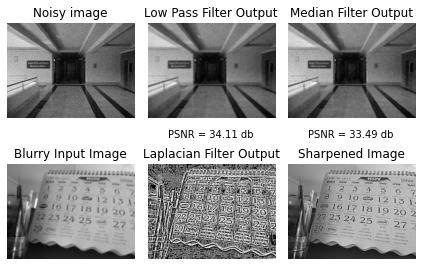

In [11]:
if __name__ == "__main__":
    main()